# House Price Prediction Model WEEK 3 PROJECT 5

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Load and preprocess data

In [2]:
df = pd.read_csv('Housing.csv')
yes_no_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[yes_no_columns] = df[yes_no_columns].replace({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3180\4181720669.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_columns] = df[yes_no_columns].replace({'yes': 1, 'no': 0})


In [3]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [6]:
df.isna().sum()

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

In [7]:
df.shape

(545, 14)

## Train-test split and scaling

In [8]:
X = df.drop(columns=['price'])  
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build and train RandomForest Regressor

In [9]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
y_pred = rf_model.predict(X_test)

## Model evaluation

In [11]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Absolute Error: 1022560.0527522935
R2 Score: 0.6114024924156645


## Data Visualization

### Heatmap for correlation

Text(0.5, 1.0, 'Correlation Heatmap')

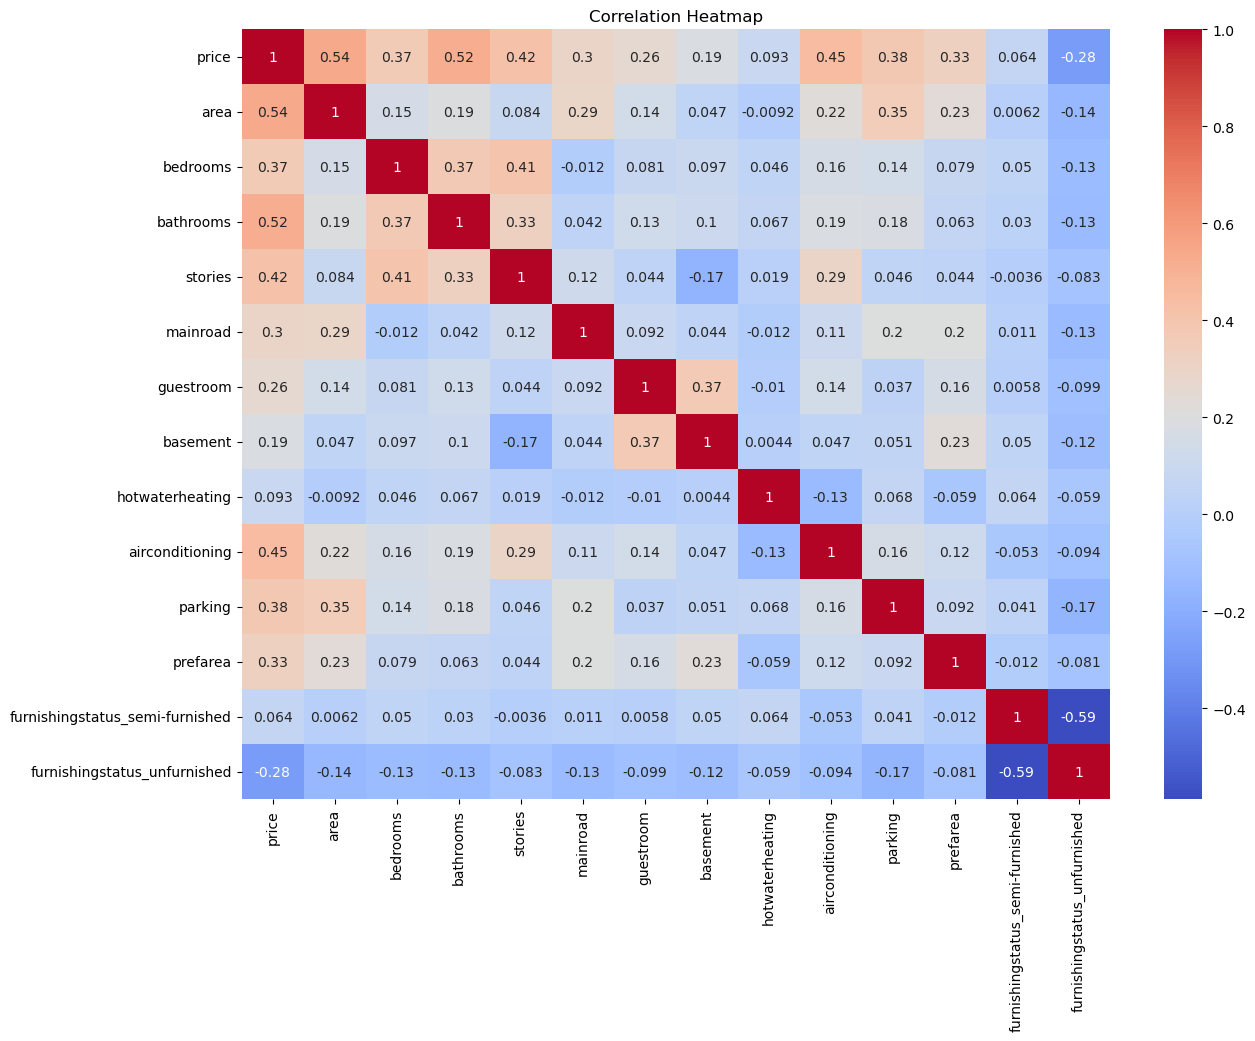

In [12]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

### Distribution of house prices

Text(0.5, 1.0, 'Price Distribution')

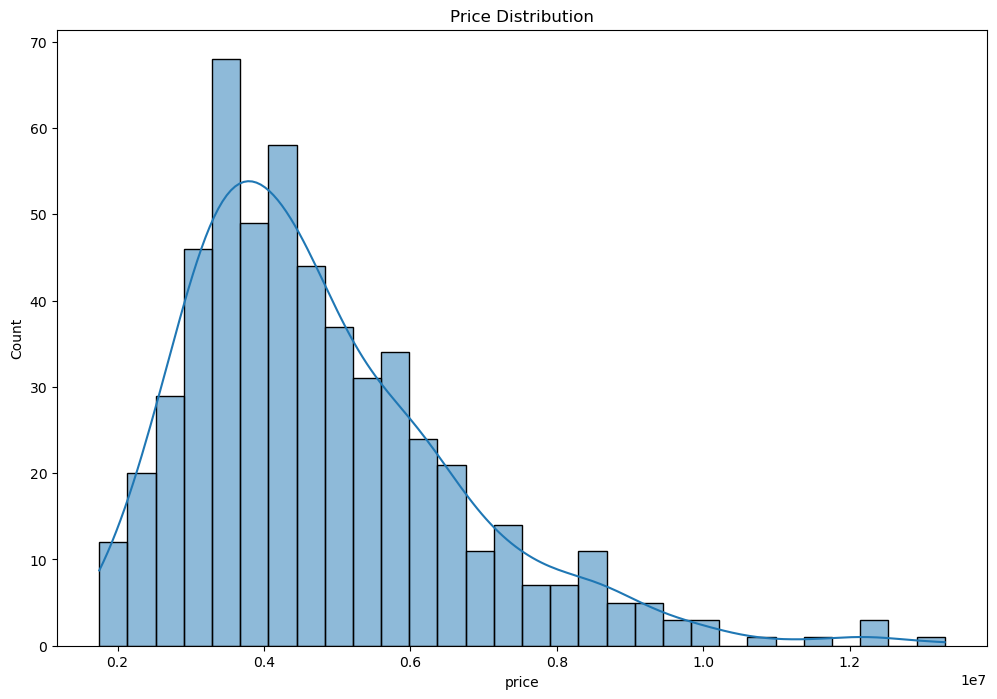

In [13]:
plt.figure(figsize=(12, 8))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')

### Scatterplot of price vs area

Text(0.5, 1.0, 'Price vs Area')

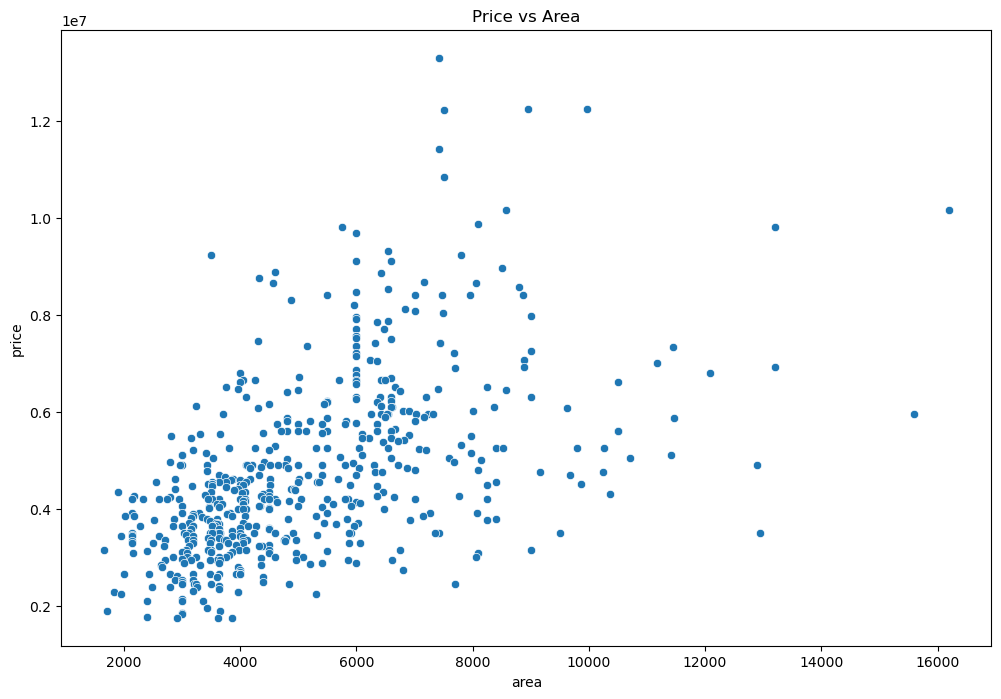

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Price vs Area')

### Boxplot for categorical features

Text(0.5, 1.0, 'Price vs Air Conditioning')

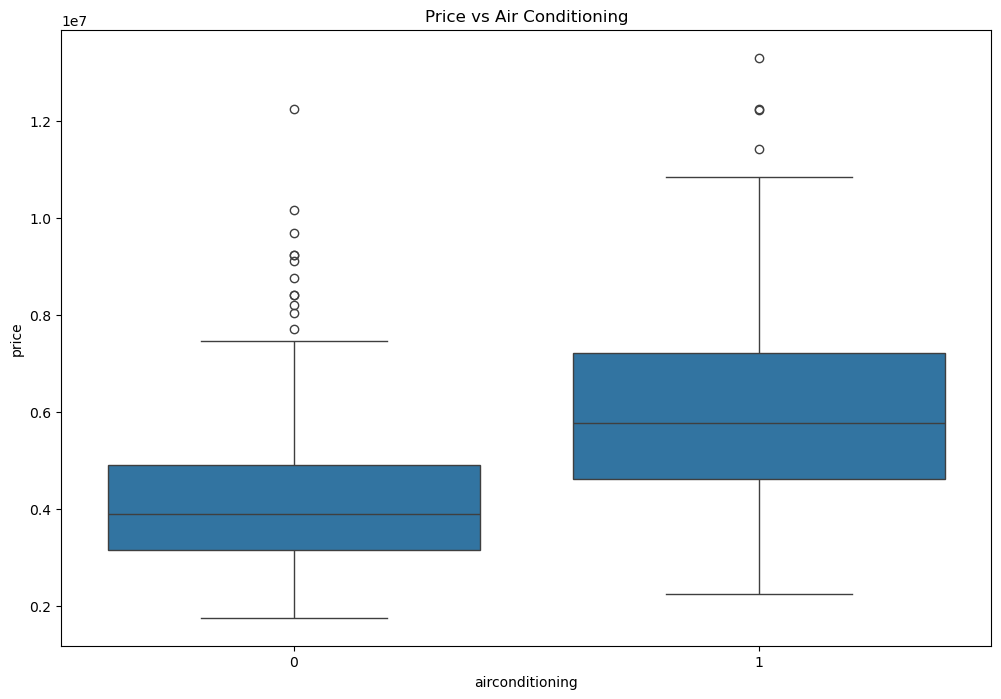

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='airconditioning', y='price', data=df)
plt.title('Price vs Air Conditioning')

## Predicting

In [16]:
def predict_house_price():
    input_data = {}
    for feature in X.columns:
        value = float(input(f"Enter value for {feature}: "))
        input_data[feature] = value
    input_df = pd.DataFrame([input_data], columns=X.columns)

    prediction = rf_model.predict(input_df)
    return prediction[0]
print("\n\nPredicted House Price:", predict_house_price())

Enter value for area:  2000
Enter value for bedrooms:  2
Enter value for bathrooms:  2
Enter value for stories:  1
Enter value for mainroad:  0
Enter value for guestroom:  0
Enter value for basement:  0
Enter value for hotwaterheating:  0
Enter value for airconditioning:  0
Enter value for parking:  0
Enter value for prefarea:  0
Enter value for furnishingstatus_semi-furnished:  0
Enter value for furnishingstatus_unfurnished:  0




Predicted House Price: 3410113.0


1 means YES and 0 means NO